In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [2]:
import numpy as np

np.random.seed(42)
a = np.random.randn(4,4)
np.round(a, 3)

array([[ 0.497, -0.138,  0.648,  1.523],
       [-0.234, -0.234,  1.579,  0.767],
       [-0.469,  0.543, -0.463, -0.466],
       [ 0.242, -1.913, -1.725, -0.562]])

In [3]:
from numpy.linalg import svd

U, Sigma, Vt = svd(a)

U.shape, Sigma.shape, Vt.shape

((4, 4), (4,), (4, 4))

In [4]:
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

U matrix:
 [[-0.373 -0.598 -0.642  0.302]
 [-0.488 -0.35   0.745  0.289]
 [ 0.113  0.444 -0.062  0.887]
 [ 0.781 -0.568  0.168  0.197]]
Sigma Value:
 [3.08  1.926 0.92  0.342]
V transpose matrix:
 [[ 0.021 -0.412 -0.783 -0.466]
 [-0.291  0.775 -0.086 -0.554]
 [-0.461 -0.479  0.544 -0.512]
 [-0.838 -0.017 -0.289  0.462]]


In [5]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)

np.round(a_, 3)

array([[ 0.497, -0.138,  0.648,  1.523],
       [-0.234, -0.234,  1.579,  0.767],
       [-0.469,  0.543, -0.463, -0.466],
       [ 0.242, -1.913, -1.725, -0.562]])

In [6]:
a[2] = a[0] + a[1]
a[3] = a[0]

np.round(a,3)

array([[ 0.497, -0.138,  0.648,  1.523],
       [-0.234, -0.234,  1.579,  0.767],
       [ 0.263, -0.372,  2.227,  2.29 ],
       [ 0.497, -0.138,  0.648,  1.523]])

In [7]:
U, Sigma, Vt = svd(a)

print('Sigma Value:\n',np.round(Sigma,3))

Sigma Value:
 [4.266 1.19  0.    0.   ]


In [8]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]

U_.shape, Sigma_.shape, Vt_.shape

((4, 2), (2, 2), (2, 4))

In [9]:
a_ = np.dot(np.dot(U_,Sigma_), Vt_)

np.round(a_, 3)

array([[ 0.497, -0.138,  0.648,  1.523],
       [-0.234, -0.234,  1.579,  0.767],
       [ 0.263, -0.372,  2.227,  2.29 ],
       [ 0.497, -0.138,  0.648,  1.523]])

In [10]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(42)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)

U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

원본 행렬:
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [2.86568718 1.19916597 0.83284421 0.69439648 0.33820753 0.1796858 ]


In [11]:
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('Truncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('Truncated SVD Sigma값 행렬:', Sigma_tr)

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)
Truncated SVD Sigma값 행렬: [0.69439648 0.83284421 1.19916597 2.86568718]


In [12]:
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print('Truncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

Truncated SVD로 분해 후 복원 행렬:
 [[ 0.35516599  1.01480935  0.68496289  0.51848519  0.19573534  0.1960209 ]
 [ 0.04533443  0.81666457  0.66003853  0.7415869   0.02980843  0.94557742]
 [ 0.75949877  0.1342645   0.31781619  0.1820748   0.39486547  0.49894463]
 [ 0.52969064  0.36606474  0.4588181   0.16930127  0.16521473  0.38448922]
 [ 0.45627011  0.70969972  0.27349113  0.5854568   0.57820516  0.00469116]
 [ 0.62513083  0.22423385 -0.00192983  0.91638042  0.95021847  0.83390036]]


Text(0, 0.5, 'TruncatedSVD Component 2')

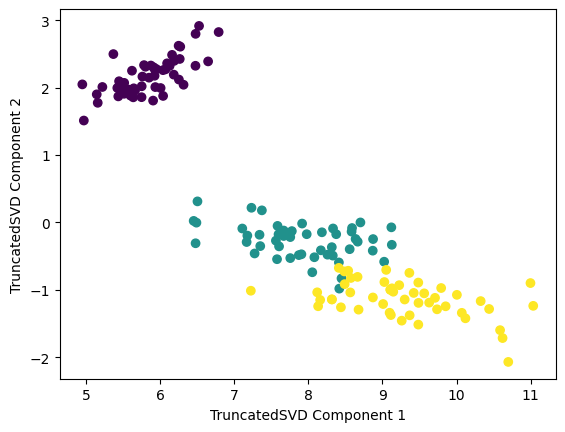

In [13]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

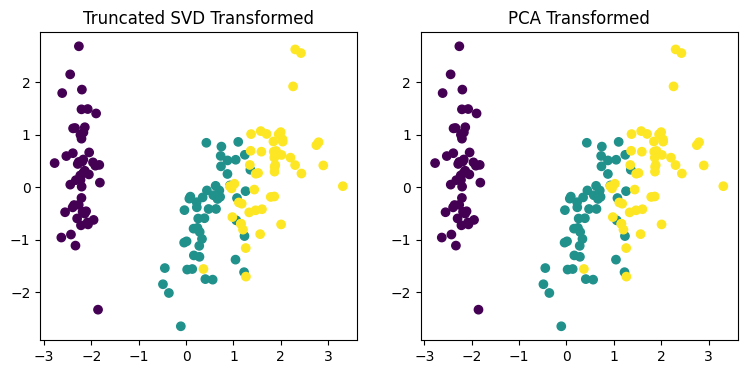

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [15]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.342304591026097e-15
-1.3877787807814457e-17
